In [0]:
import tensorflow as tf

### Versión

In [0]:
print(tf.__version__)

2.1.0


## Tensores

In [0]:
x = tf.constant([[2,5,0]])
x

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[2, 5, 0]], dtype=int32)>

In [0]:
x[0][0] = 1

TypeError: ignored

In [0]:
x.shape

TensorShape([1, 3])

### Convertir a numpy

In [0]:
print(type(x))
x = x.numpy()
print(type(x))


<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


### Ejecución ansiosa (eager execution)
* [Documentación](https://www.tensorflow.org/guide/eager)
* Activada por default en tensorflow 2.0
* Desactivar con `tf.disable_v2_behavior()`


In [0]:
tf.executing_eagerly() ###1

True

In [0]:
a = tf.constant(2)
b = tf.constant(3)
c = a + b
print(c)


tf.Tensor(5, shape=(), dtype=int32)


In [0]:
x = [[1,0,1]]
y = tf.constant([[1,1,1]])

r = tf.matmul(tf.transpose(y) ,x )
print("Resultado",r)
print()
print(r + 2)

Resultado tf.Tensor(
[[1 0 1]
 [1 0 1]
 [1 0 1]], shape=(3, 3), dtype=int32)

tf.Tensor(
[[3 2 3]
 [3 2 3]
 [3 2 3]], shape=(3, 3), dtype=int32)


### Ones y Zeros

In [0]:
a = tf.ones(shape= (4,3))
a

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [0]:
b = tf.zeros(shape = (1,1))
b

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>


### Tensores aleatorios



In [0]:
z = tf.random.uniform(shape = (3,3), minval =  0 , maxval = 100)
z

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[64.36859 , 89.45303 , 46.965263],
       [97.88798 , 72.27141 , 49.889206],
       [ 5.559933, 48.990665, 33.633198]], dtype=float32)>

In [0]:
h = tf.random.normal(shape = (3,3), mean  = 10 , stddev = 1.0)
h

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 8.743766,  9.213352,  9.538583],
       [10.690212, 10.138704, 10.26572 ],
       [10.444667,  9.931966, 10.283203]], dtype=float32)>

### Apartadores (placeholders)

In [0]:
a = tf.placeholder(tf.float64) ###2

AttributeError: ignored

### Operaciones

In [0]:
a  = tf.constant(5)  
b = tf.constant(2)

c = a + b
c 

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [0]:
print(c)

tf.Tensor(7, shape=(), dtype=int32)


In [0]:
print(c + 10)

tf.Tensor(17, shape=(), dtype=int32)


### Variables

In [0]:
a = tf.Variable([0.5], tf.float64)
b  = tf.Variable(2.0)
c = tf.Variable(tf.random.normal(shape = (5,5)))
print(c)


<tf.Variable 'Variable:0' shape=(5, 5) dtype=float32, numpy=
array([[-1.3713856 , -1.9172331 ,  0.18341091, -0.9880844 , -0.07860714],
       [ 1.7787533 ,  0.29785463,  1.2618688 , -0.6106929 , -1.2073467 ],
       [-0.9877198 ,  0.11580277,  0.00489833,  0.65592545,  0.43491092],
       [ 0.65977424,  0.5175046 ,  1.3810018 , -2.8422995 ,  0.7324317 ],
       [-0.3521564 , -0.4826301 ,  1.0586786 ,  1.1759588 , -0.1506712 ]],
      dtype=float32)>


In [0]:
a.assign([100])
a

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([100.], dtype=float32)>

In [0]:
k = tf.Variable(10)
k.assign( k + 1)
k

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=11>

### Gradientes

* $g(x) = c*x$
* $\frac{dg}{dx} = c$

In [0]:
c = 10.0 
x = tf.Variable(2.0)


def g(x):
    return c *x

###3
with tf.GradientTape() as tape:
  tape.watch(x)
  resultado_g = g(x)
  dg_dx  = tape.gradient(resultado_g,x)
  print(dg_dx)

tf.Tensor(10.0, shape=(), dtype=float32)


* $ f(x) =  x^{n}$
* $\frac{df}{dx} = n*x^{n-1}$

In [0]:
x = tf.constant(10.0)

def f(x):
  return tf.pow(x,3)


with tf.GradientTape() as tape:
  tape.watch(x)
  f_resultado = f(x)

print(f_resultado) #10^3 = 1000
df_dx = tape.gradient(f_resultado,x)
print(df_dx) #3*10^2 = 300


tf.Tensor(999.99994, shape=(), dtype=float32)
tf.Tensor(299.99997, shape=(), dtype=float32)


# Ejemplo: Regresión Líneal

In [0]:
d = 2  # dimensiones

# Parametros 
W = tf.Variable(  tf.random.uniform(shape = (d,1), minval= -1, maxval =1)*tf.sqrt(6/(d+1)))
b = tf.Variable(tf.zeros(shape = (1,)))

In [0]:
W,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.58844316],
        [ 1.2744519 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [0]:
def forward(X):
  return tf.matmul(X,W) + b

In [0]:
x_ = tf.constant([[1.0,1.0],
                  [2.0,2.0],
                  [1.0,0.0]])
forward(x_)



<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.6860087 ],
       [ 1.3720174 ],
       [-0.58844316]], dtype=float32)>

In [0]:
def costo(y_, y):
  return tf.reduce_mean(tf.square(y - y_))/2
  

In [0]:
@tf.function ###4
def entrena(X,y, tasa = 0.01):
  with tf.GradientTape() as tape:
    
    # Número de ejemplos 
    m = X.shape[0]

    # Predicción
    y_ = forward(X)

    # Costo o error
    error  = costo(y, y_)

    # Calcula gradientes
    dcosto_dw, dcosto_db = tape.gradient(error, (W,b))

    # Actualiza pesos
  
  #Descenso por el gradiente
  W.assign(W - tasa* dcosto_dw)
  b.assign(b - tasa* dcosto_db)

  return error





### Visualizar el conjunto de datos

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Crea el conjunto de datos 
n = 10000
ejemplos = np.random.multivariate_normal(
    mean=[0, 0], cov=[[1, 0.5],[0.5, 1]], size=n)
x = ejemplos.astype(np.float32)

y = x[:,0] *10 + x[:,1]* -2 + 5

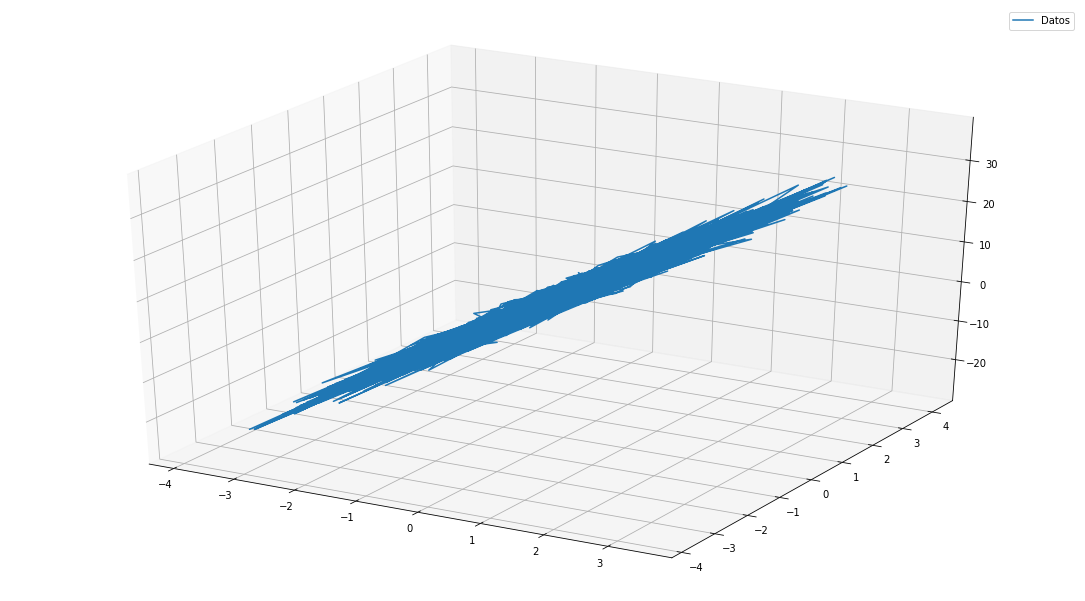

In [0]:
fig  = plt.figure(figsize=(19.20,10.80))
ax = fig.gca(projection = '3d')
ax.plot(x[0:,0].flatten(),x[0:,1].flatten(),y[0:].flatten(), label = "Datos")
ax.legend()

### Preparar el conjunto de datos para entrenar

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((x,y)) ###5
dataset = dataset.shuffle(1000).batch(128)



In [0]:
ejemplos = next(iter(dataset))
print(ejemplos)
print(ejemplos[0].shape)

(<tf.Tensor: shape=(128, 2), dtype=float32, numpy=
array([[-5.10872304e-01, -1.20135200e+00],
       [ 6.02789164e-01, -6.05502605e-01],
       [ 1.34755224e-01,  9.69385505e-01],
       [-1.20397913e+00,  1.68601722e-01],
       [-1.29528379e+00, -1.82968748e+00],
       [-4.01363671e-01, -1.86371282e-01],
       [ 5.93589723e-01,  9.29831743e-01],
       [ 7.64223695e-01,  1.23520339e+00],
       [ 7.45907664e-01, -3.67173970e-01],
       [-5.68195730e-02, -2.75377095e-01],
       [-2.19175887e+00, -1.14090180e+00],
       [-6.01066649e-01, -3.94449115e-01],
       [-9.74820614e-01,  4.09826487e-01],
       [ 1.95172322e+00,  1.57796109e+00],
       [-4.32471007e-01, -1.04438388e+00],
       [-1.73638716e-01,  5.91379166e-01],
       [ 2.16904312e-01,  1.57784134e-01],
       [ 1.14608422e-01, -2.58184135e-01],
       [ 1.87183619e+00,  8.53083730e-01],
       [ 6.94499373e-01, -1.26704288e+00],
       [ 5.73801339e-01,  8.80422950e-01],
       [ 8.46505344e-01,  1.99587893e+00],
   

In [0]:
epochs = 100

for e in range(epochs):
  for i,(x,y) in enumerate(dataset):
    error = entrena(x,y,tasa = 0.01)

    if i % 100 == 0:
      print("Costo {:0.3f} en epoch: {} ".format(error, e))
  

Costo 45.139 en epoch: 0 
Costo 43.362 en epoch: 1 
Costo 46.067 en epoch: 2 
Costo 59.684 en epoch: 3 
Costo 54.435 en epoch: 4 
Costo 53.701 en epoch: 5 
Costo 49.811 en epoch: 6 
Costo 55.466 en epoch: 7 
Costo 53.577 en epoch: 8 
Costo 58.992 en epoch: 9 
Costo 49.273 en epoch: 10 
Costo 53.154 en epoch: 11 
Costo 46.001 en epoch: 12 
Costo 44.855 en epoch: 13 
Costo 47.003 en epoch: 14 
Costo 53.896 en epoch: 15 
Costo 48.335 en epoch: 16 
Costo 53.229 en epoch: 17 
Costo 50.476 en epoch: 18 
Costo 55.714 en epoch: 19 
Costo 51.141 en epoch: 20 
Costo 49.477 en epoch: 21 
Costo 55.669 en epoch: 22 
Costo 44.026 en epoch: 23 
Costo 46.269 en epoch: 24 
Costo 52.358 en epoch: 25 
Costo 54.312 en epoch: 26 
Costo 55.440 en epoch: 27 
Costo 63.246 en epoch: 28 
Costo 57.814 en epoch: 29 
Costo 60.599 en epoch: 30 
Costo 49.967 en epoch: 31 
Costo 51.353 en epoch: 32 
Costo 43.902 en epoch: 33 
Costo 50.874 en epoch: 34 
Costo 50.307 en epoch: 35 
Costo 35.996 en epoch: 36 
Costo 49.20

In [0]:
print("W: {},\n b: {}".format(W,b))

W: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.49282515],
       [ 0.7887362 ]], dtype=float32)>,
 b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.4573572], dtype=float32)>


## Tensorflow 1.0

In [0]:
import tensorflow.compat.v1 as tf1

In [0]:
tf1.disable_v2_behavior()
g = tf1.placeholder(tf1.float64)

Instructions for updating:
non-resource variables are not supported in the long term
